# Ο πλήρης αθροιστής
Το κύκλωμα αυτό θα προσθέτει δυο qubits είσοδου συνυπολογίζοντας και πιθανό κρατούμενο qubit από προηγούμενη πρόσθεση.

In [2]:
from qiskit import QuantumCircuit, QuantumRegister

Έστω $a, b$ τα δυο qubit εισόδου και $c$ το κρατούμενο εισόδου. 
Το qubit $d=\ket{0}$ και θα χρησιμοποιηθεί ως κενός καταχωρητής.  
Έστω ένα κύκλωμα $C$ που είναι στιγμιότυπο της κλάσης `QuantumCircuit` και θα αποτελείται από τα qubits $a, b, c$ και $d$. 

In [3]:
a = QuantumRegister(1, 'a')
b = QuantumRegister(1, 'b')
c = QuantumRegister(1, 'c')
d = QuantumRegister(1, 'd=0')
C = QuantumCircuit(a, b, c, d)

Ο συγκεκριμένος πλήρης αθροιστής αποτελείται από δυο άλλα μικρότερα κυκλώματα, δυο ημι-αθροιστές.  
Η λογική του κυκλώματος είναι ως εξής:
- Δρα ο πρώτος ημι-αθροιστής στα qubits $a, b$ και $c$. Στην έξοδο του παράγεται το μερικό άθροισμα $s'$ 
μαζί με το μερικό κρατούμενο $c'$ που μπορεί να παράχθηκε κατά την πρόσθεση.
- Στη δεύτερη φάση, ο δεύτερος ημι-αθροιστής δρα πάνω στα qubits $s' = a, c' = b$ και $d$ και παράγεται το άθροισμα μαζί με το κρατούμενο, αλλά αυτή τη φορά με συνυπολογισμό πιθανού κρατούμενου.

In [4]:
C.ccx(a, b, c)
C.cx(a, b)
C.ccx(b, c, d)
C.cx(b, c)

Προαιρετικά, μπορούμε να επαναφέρουμε το qubit $b$ στην αρχική του κατάσταση δρώντας πάνω του με μια πύλη $CNOT$, με control qubit το qubit $a$.

In [5]:
C.cx(a, b)

/home/thanasis/quantum-alu/.venv/lib/python3.11/site-packages/qiskit/visualization/circuit/latex.py:154: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, _ = load_style(style)


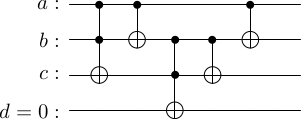

In [6]:
C.draw('latex')